 # <span style='color :steelblue;font-size:35px' >Unsupervised Project</span> 

 # <span style='color :steelblue;font-size:25px' >PART-1</span>

**DOMAIN:** Automobile

**CONTEXT:** The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes.

**DATA DESCRIPTION:** The data concerns city-cycle fuel consumption in miles per gallon 
- **Attribute Information:**
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) 

**PROJECT OBJECTIVE:** Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 
**Steps and tasks: [ Total Score: 25 points]**
- **1. Import and warehouse data:** [ Score: 3 points ]
- Import all the given datasets and explore shape and size. 
- Merge all datasets onto one and explore final shape and size.
- Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
- Import the data from above steps into python.

- **2. Data cleansing:** [ Score: 3 points ]
- Missing/incorrect value treatment
- Drop attribute/s if required using relevant functional knowledge
- Perform another kind of corrections/treatment on the data.

- **3. Data analysis & visualisation:** [ Score: 4 points ]
- Perform detailed statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create 
your own features if required. Be highly experimental and analytical here to find hidden patterns.

- **4. Machine learning:** [ Score: 8 points ]
- Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 
- Share your insights about the difference in using these two methods. 

- **5. Answer below questions based on outcomes of using ML based methods.** [ Score: 5 points ]
- Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
- Use linear regression model on different clusters separately and print the coefficients of the models individually
- How using different models for different clusters will be helpful in this case and how it will be different than using one single model without 
clustering? Mention how it impacts performance and prediction.

- **6. Improvisation:** [ Score: 2 points ]
- Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to 
perform a better data analysis in future

## 1. Import and warehouse data:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(color_codes=True)

from sklearn.metrics import silhouette_score, silhouette_samples

import warnings as wn
wn.filterwarnings('ignore')

ModuleNotFoundError: No module named 'PIL'

###  Load all the dataset

In [2]:
#Load the dataset
automobile_data_1 = pd.read_csv('./Part1-Car_name.csv')
automobile_data_2 = pd.read_json('./Part1-Car-Attributes.json')

### i. Explore shape and size. 

In [3]:
print('Shape of automobile_data_1:', automobile_data_1.shape)
automobile_data_1.head()

Shape of automobile_data_1: (398, 1)


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


- This data set only contain the car name

In [4]:
print('Shape of automobile_data_2:', automobile_data_2.shape)
automobile_data_2.head()

Shape of automobile_data_2: (398, 8)


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


- **Both the dataset have same no.of rows, automobile_data_1 have the car name. So we will merge both the dataset.**

### ii. Merge all datasets onto one and explore final shape and size.

In [5]:
#merging telecome_df2 and telecome_df3
automobie_data = pd.merge(left=automobile_data_1, left_index=True,
                    right=automobile_data_2, right_index=True,
                    how='inner')

In [6]:
print('Shape of automobile after merging the car name:', automobie_data.shape)
automobie_data.head()

Shape of automobile after merging the car name: (398, 9)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


- **After merging the car_name dataframe no.of rows 398 and no.of attributes 9.**

### iii. Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [7]:
#export data in csv format to the working directory
automobie_data.to_csv('./automobie_data.csv',index=False)

#export data in xlsx format to the working directory
automobie_data.to_excel('./automobie_data.xlsx',index=False)

#export data in json format to the working directory
automobie_data.to_json('./automobie_data.json')

- **Exported the data and stored in same working directory**

### iv. Import the data from above steps into python.

In [8]:
#Load the data from the csv file exported above
automb_data = pd.read_csv('./automobie_data.csv')

- **Imported the data from the data set we have saved after merging the original two data set.**

### v.Check the share of the data after imported.

In [9]:
#check the shape and sise
print('Shape of automobile:', automb_data.shape)
automb_data.head()

Shape of automobile: (398, 9)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


- **Shape of the data remain same after loading from the exported file.**

## 2. Data cleansing: 

###  i.Missing/incorrect value treatment

In [10]:
#check if any column have missing value
#Fucniton to check the missing value
def missing_val(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value in dataset.')

In [11]:
#cehck missing value
missing_val(automb_data)

There is no missing value in dataset.


In [12]:
### check the datatypes of data with addition information using info
automb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- **hp column data type is object. That indicates something is not right with that column. It may contain some non numeric data.**

### ii.Find the non-numic data in 'hp' column

In [13]:
#hp column data type is object. That means it may have some non numberic information
#Check 'hp' column is there is any non-numeric info
automb_data[automb_data['hp'].str.contains(r'[^0-9]')]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


- **'hp' column have question mark(?) for few rows.**

In [14]:
print('hp',':',sum(automb_data['hp'] == '?'))

hp : 6


- **hp column have 6 question mark (?) rows.**

### ii.Replace question mark with NaN

In [15]:
#Replace question mark with median
automb_data = automb_data.replace('?', np.nan)

### iii.Change 'hp' column datatyes to float

In [16]:
#change hp column datatyes to float
automb_data['hp'] = automb_data['hp'].astype('float64')

### iv.Replace null with median

In [17]:
#replace null with median
automb_data['hp'].fillna(automb_data['hp'].median(), inplace=True)

# replace for all column
# if any non numeric column is there it will not work
#automb_data = automb_data.apply(lambda x: x.fillna(x.median())) 

- **Replaced NaN value in hp column with median.**

In [18]:
#check the data types after imputing null with median
automb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


- **Except "car_name" all the columns are numeric type.**

### v.Drop attribute/s if required using relevant functional knowledge

In [19]:
#As car name have no relation with miles per galon, so drop this column.
# Before altering original data keep one copy of data then drop
automb_data_backup = automb_data.copy()
automb_data = automb_data.drop('car_name', axis=1)

- **Since car_name have no relation with miles for galon, remove this column.**

In [20]:
#check the data after dropping car-name column
automb_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


- **automobile data set after removing car_name**

In [21]:
#export the data to csv file. for backup propose
automb_data.to_csv("autompg_data_1.csv")

- **Saved the file aflter the data cleansing done for backup purpose.**

## 3. Data analysis & visualisation: 

### i.Perform detailed statistical analysis on the data.

### Univariate analysis:

#### 5 Point summary of numerical attributes

In [22]:
#use describe funciton to check the descriptive statistics of the numberical variables
automb_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### Observation:
- mpg is normally distributed with very little right skewed.
- cyn is categorical in nature range from 3 to 8.
- displacement is right skewed.
- hp is right skewed. Looks like few car with higher hp.
- weight of the car also righ skewed. Lookd like few car with havy weight.
- acc mean is close to median. so it normally distributed.
- most of car manufactured yr between 1970 to 1982.
- Origin of car vary form 1 to 3. may be car manufature in 3 different place or countries.


### Distribution of continuous variables

In [ ]:
#define function for histplot


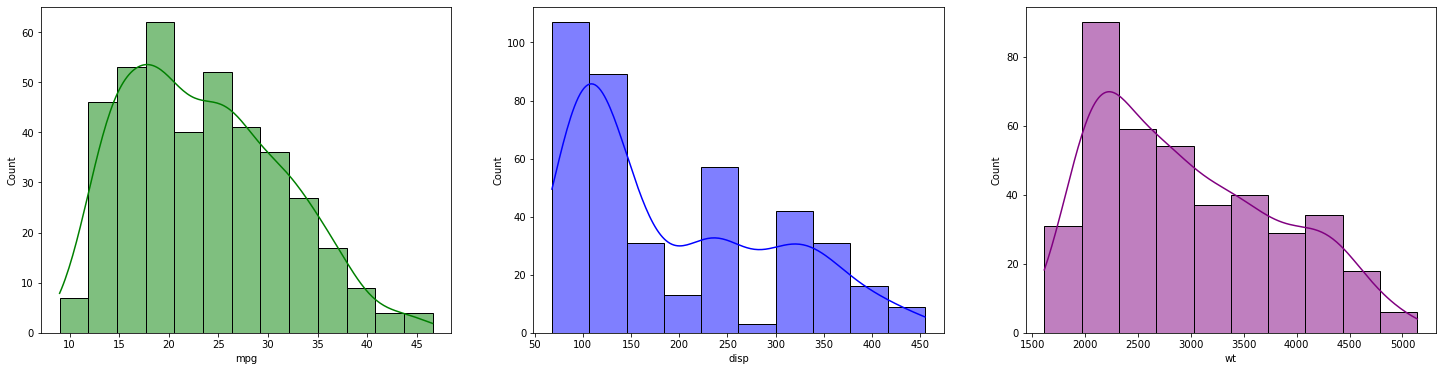

In [23]:
#distribution for the continuous variable
plt.figure(figsize=(25,6))

#distribution of mpg
plt.subplot(1,3,1)
sns.histplot(automb_data.mpg, kde= True, color='green', edgecolor = 'black');

#distribution of disp
plt.subplot(1,3,2)
sns.histplot(automb_data.disp, kde= True, color='blue', edgecolor = 'black');

#distribution of wt
plt.subplot(1,3,3)
sns.histplot(automb_data.wt, kde= True, color='purple', edgecolor = 'black');

- **displacement and weight is right skewed**
- **more no.of car diplacement between 100 to 150 and very few have higher displacement.**
- **Few car weight is more than 4500 and most of car weigh between 2000 to 3000.**
- **mpg mostly normal distribited with with little right skewed, may be because of some car weight is very high because of that**.

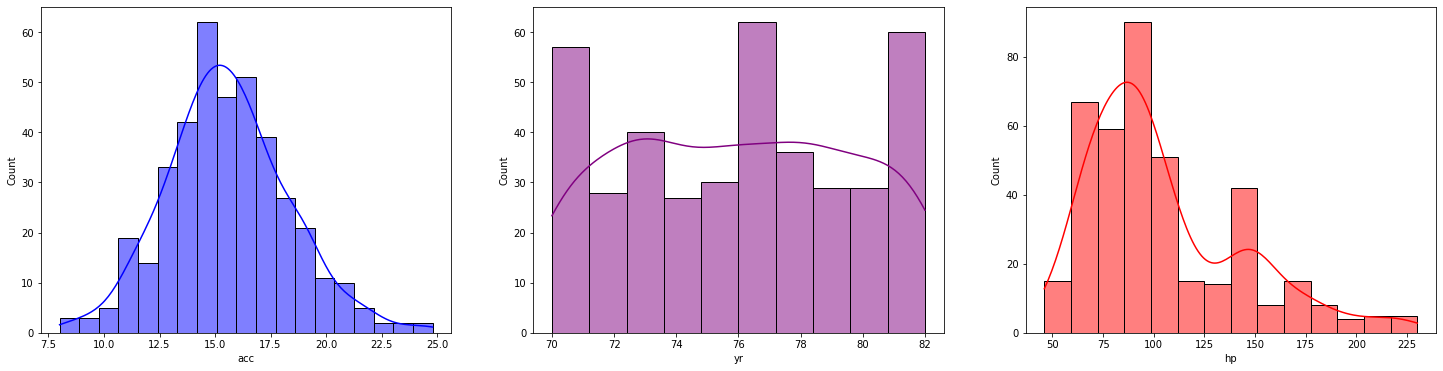

In [24]:
#distribution for the continuous variable
plt.figure(figsize=(25,6))

#distribution of acc
plt.subplot(1,3,1)
sns.histplot(automb_data.acc, kde= True, color='blue', edgecolor = 'black');

#distribution of yr
plt.subplot(1,3,2)
sns.histplot(automb_data.yr, kde= True, color='purple', edgecolor = 'black');

#distribution of hp
plt.subplot(1,3,3)
sns.histplot(automb_data.hp, kde= True, color='red', edgecolor = 'black');


- **acc is normally distributed.**
- **hp is righ skewed. few cars with higher hp.**
- **year of manufature uniformly distributed between 70 to 82 with some years like 82, 76 and 70 have little more.**

### ii. Check distribution of categorical variables

In [25]:
#define function to check the count disctribution for categorical variable
def count_plot(data_frame, column_name, hue_in, index_i, index_j, ax):
    
    #based on hue input call diffent countplot:
    if (hue_in == ''):
        ax = sns.countplot(data=data_frame, x=column_name, ax = ax[index_i][index_j])
    else:
        ax = sns.countplot(data=data_frame, x=column_name, hue=hue_in, ax = ax[index_i][index_j])
        
    #This code will add percentage to each bar in  plot
    total = len(data_frame[column_name])    
    for p in ax.patches:    
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100* height/total),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))

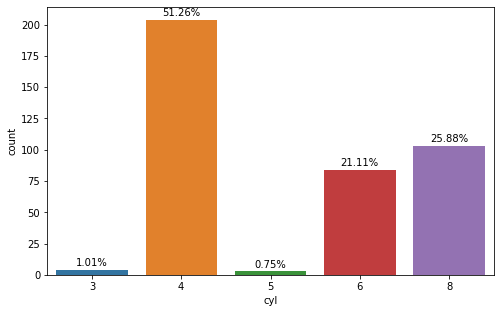

In [26]:
# Distribution of cyl
fig, ax = plt.subplots(1, 1, figsize= (8,5), squeeze=False)
count_plot(automb_data, 'cyl', '', 0, 0, ax)

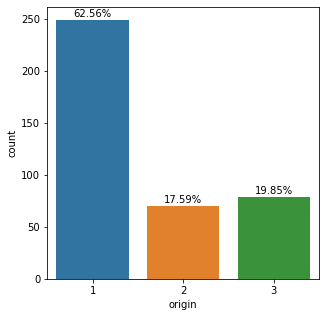

In [27]:
# Distribution of origin
fig, ax = plt.subplots(1, 1, figsize= (8,5), squeeze=False)
count_plot(automb_data, 'origin', '', 0, 0, ax)

- **More no.of cars with 4 cylinder followed by 8 and 6. Very few car with no.of cylinder 3 and 5.**
- **Nearly 63% car manufacture in one place or in one country. Rest 37% belows two other place or countries with on an average equally distributed**

### iii.Check the skewness and outliers using boxplot

In [28]:
#Box plot to check if any outliers in data
#define one fucniton to do box plot
def box_plot(data, columnlist):
    dataset = data
    column_list = columnlist
    length_columnlist = len(columnlist)
    
    #plot colors
    colors_list = ['lightgreen', 'lightblue', 'pink']
    
    if(length_columnlist > 3):
        length_columnlist = 3
    
    #plot the graph
    plt.figure(figsize=(15, 10))
    for i in range(length_columnlist):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data= dataset, x=column_list[i], color = colors_list[i] )

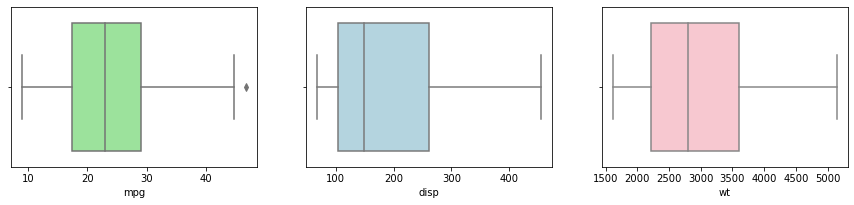

In [29]:
#box plot for 'mpg', 'disp', 'wt'
box_plot(automb_data, ['mpg', 'disp', 'wt'])

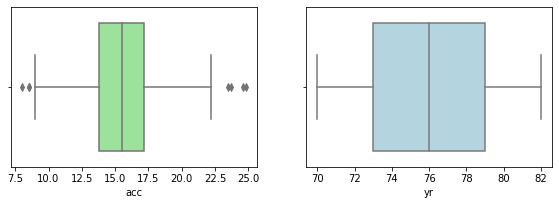

In [30]:
#box plot 'acc', 'yr'
box_plot(automb_data, ['acc', 'yr'])

- **acceleration have few outliers.**
- **mpg have also very few outliers.**

### iv. Using Quantile-based Flooring and Capping techinque scale outliers

In [31]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    
    # quartile 25: indicates first quartile
    min_val = min(data[attribute]) 
    max_val = min(data[attribute]) 
    
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    
    # find lower bound q1 - (1.5 *IQR)
    lower_fence = quartiles_25 - (1.5 * IQR)
    
    # find upper bound  q3 - (1.5 *IQR)
    upper_fence = quartiles_75  + (1.5 * IQR )
    
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + '     : quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_fence, 
           '\n'+ attribute+ ': upper_bound : ', upper_fence)
    
    print (attribute + ': Any data lower than : ', np.around(lower_fence, decimals = 2) , 
           ' and upper than :' , np.around(upper_fence, decimals = 2) , ' is considered as outlier')
    
    #print(data[data[attribute].values > upper_fence][attribute]  )
    
    #since very few out lieres are there we can use Quantile-based Flooring and Capping techinque scale outliers
    quartiles_10 = np.percentile(data[attribute], [10])
    quartiles_90 = np.percentile(data[attribute], [90])
    data[attribute] = np.where(data[attribute].values < quartiles_10, quartiles_10, data[attribute])
    data[attribute] = np.where(data[attribute].values > quartiles_90, quartiles_90, data[attribute])
    
    print(data[data[attribute].values > upper_fence][attribute]  )

In [32]:
find_outliers(automb_data,'acc')
find_outliers(automb_data,'mpg')

Presense Of Outliers In ACC
---------------------------
acc     : quartile_75 :  [17.175] 
acc: quartile_25 :  [13.825] 
acc: IQR :  [3.35] 
acc: lower_bound :  [8.8] 
acc: upper_bound :  [22.2]
acc: Any data lower than :  [8.8]  and upper than : [22.2]  is considered as outlier
Series([], Name: acc, dtype: float64)
Presense Of Outliers In MPG
---------------------------
mpg     : quartile_75 :  [29.] 
mpg: quartile_25 :  [17.5] 
mpg: IQR :  [11.5] 
mpg: lower_bound :  [0.25] 
mpg: upper_bound :  [46.25]
mpg: Any data lower than :  [0.25]  and upper than : [46.25]  is considered as outlier
Series([], Name: mpg, dtype: float64)


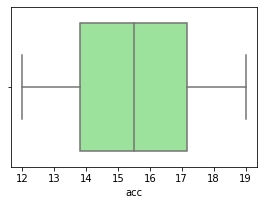

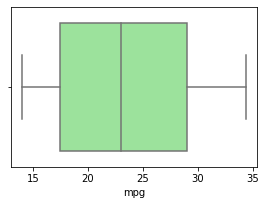

In [33]:
box_plot(automb_data, ['acc'])
box_plot(automb_data, ['mpg'])

- **Outliers handled based on Quantile-based Flooring and Capping techinque, As we can she above box plot accleration and mpg now does not have any outliers.**

### vi.Bivariate and Multivariate Analysis of data distribution

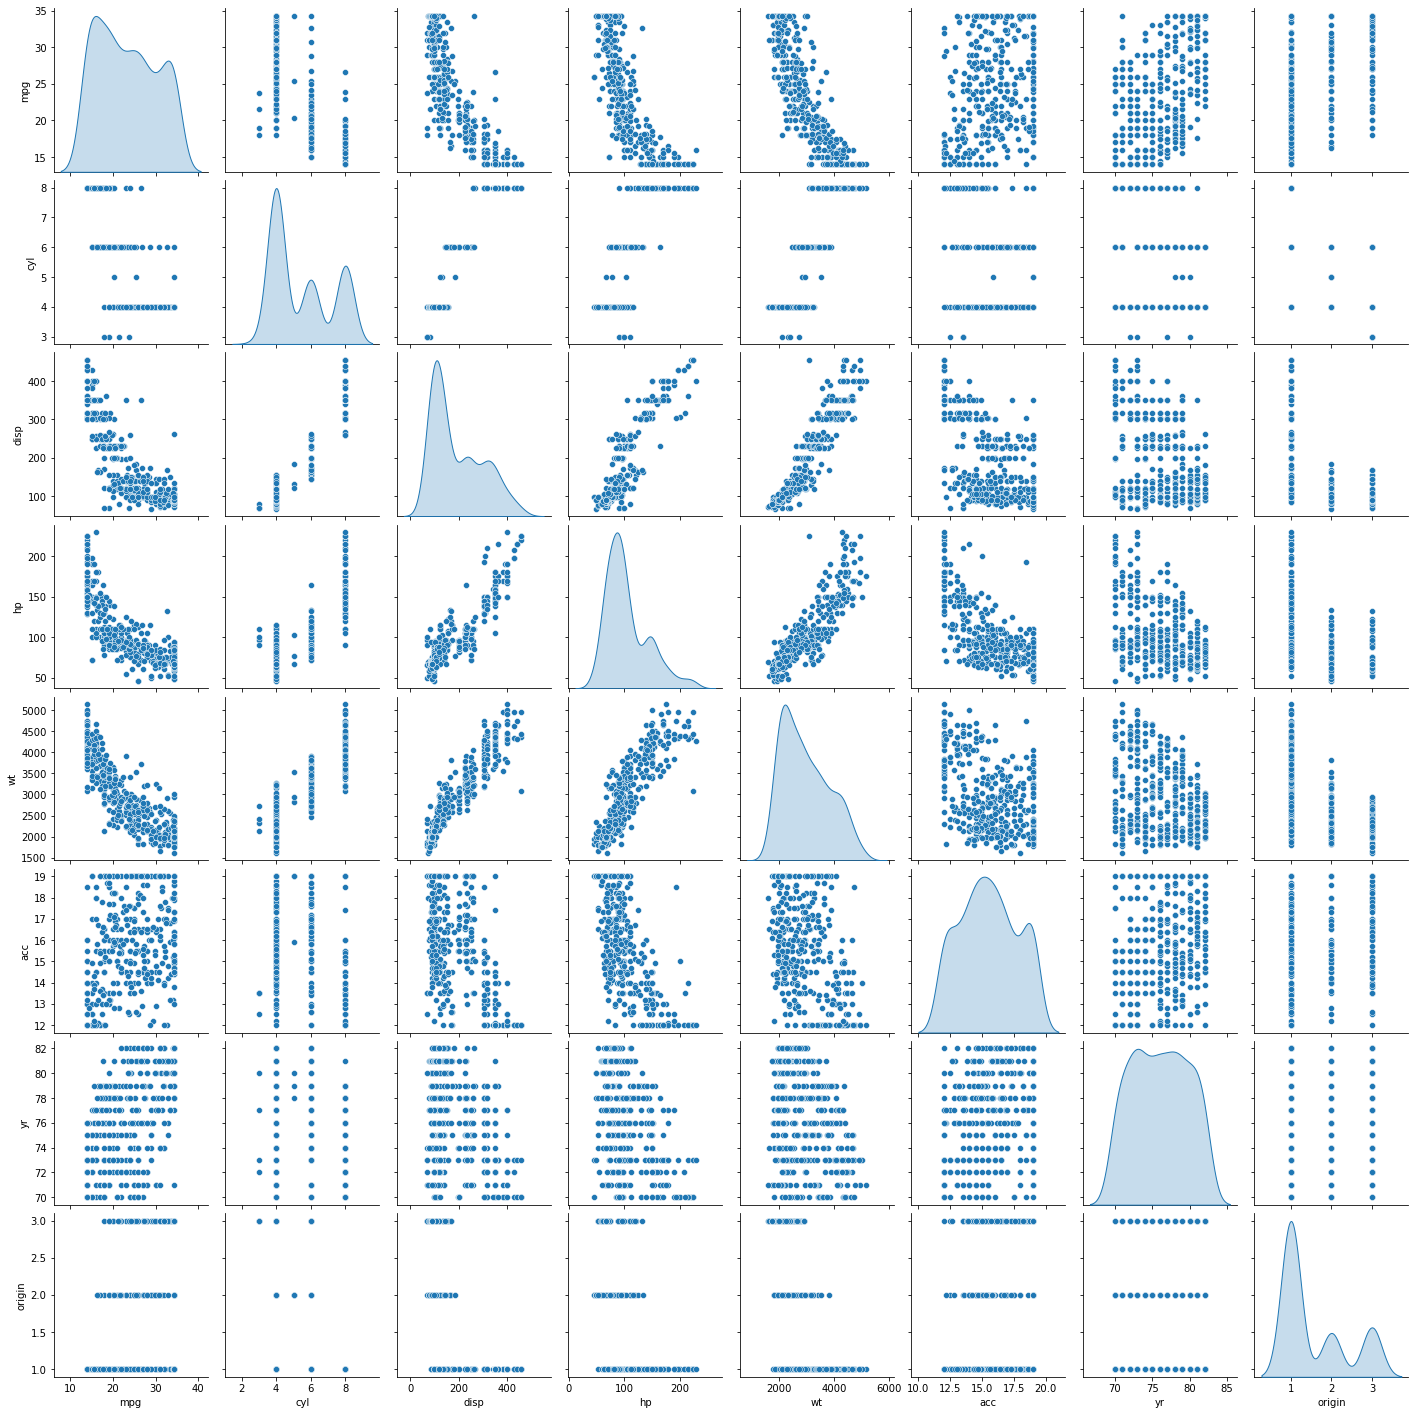

In [34]:
# to plot density curve [diag_kind='kde'] instead of histogram
sns.pairplot(automb_data, diag_kind='kde')   # to plot density curve instead of histogram


- If we looks the diagonals its looks like cyl, origin, disp, hp data distributed in 3 clusters and few like dispercyl, yr looks like distributed in tow clusters.
- Accelation looks like distributed in specila way with little tail. So this feature looks like have less contribution for prediction of mpg.
- weight have a negative co-relation with mpg. Means car weight increase mpg ll decrease.
- origin have no relation with mpg.
- hp and wt have postive co-relation with dispercyl.
- Looks like year also have no relation with mpg.
- cylinder and displacement looks like have high co-rrelation.
- weight and displacement looks like highly co-rrealted.
- So from pair plot analysis origin can be drop from the pedictor list. Since these two attributes have not much relation with mpg.

### vii. Confustion matrix to check the co-rrelation between differnt attributes:

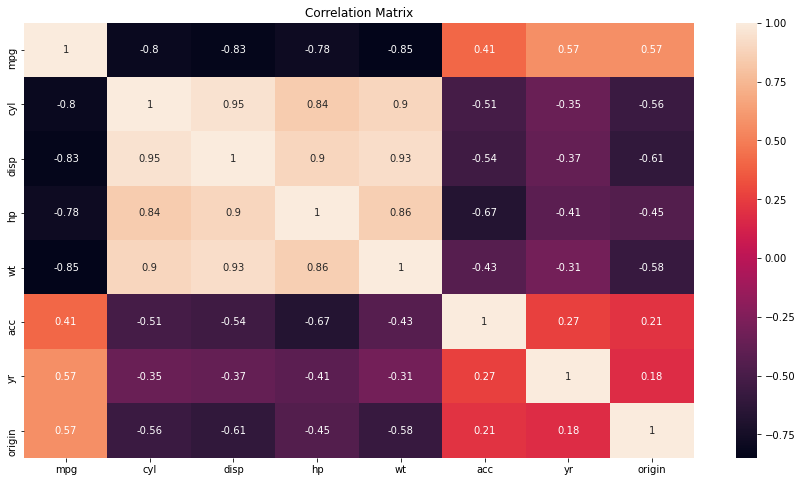

In [35]:
#check the correlation matrix
corr = automb_data.corr()

#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, ax=ax);

### Observation:

- disp and cyl is highly co-rrelated.
- wt and displacement highly co-rrelated.
- hp and cyl also have high co-rrelation.
- After checking VIF, will decide which attribute need to drop.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

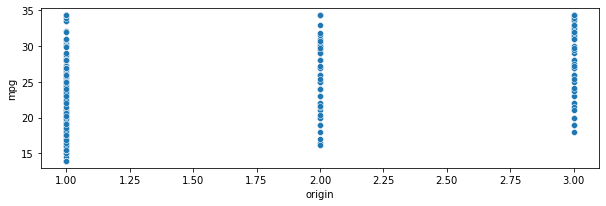

In [36]:
##check the origin relation with mpg
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
sns.scatterplot(x=automb_data.origin, y=automb_data.mpg)

- From above plot it looks like, cars from origin 2 and 3 have little high mpg compare to origin 1.
- Also observed that it does not have much predictive power for mpg. we can crease dummies to check more on this and later steps, ll check if not much weighage for mpg can be dropped.

In [37]:
#Convert origin into dummy variables using get_dummies
one_hot = pd.get_dummies(automb_data['origin'], dtype=np.int64, drop_first=True)
one_hot = one_hot.add_prefix('origin_')

# # merge in main data frame
automb_data = automb_data.join(one_hot)

In [38]:
automb_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,12.0,70,1,0,0
2,18.0,8,318.0,150.0,3436,12.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,12.0,70,1,0,0


In [39]:
# Drop the origin column form the data since we have created dumies
automb_data = automb_data.drop('origin', axis = 1, errors='ignore')

## Note: 
  - Form UCI web site got the information this data extracted on 185(***From UCI: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition***)
  - instead of yrar if we find out the yr of old of the cars, may be can add more value to our prediction. Since we know mostly oder car of same brand will have little less milage compare to newer car.
    
    

### Calculate age of each vehicle

In [40]:
###Calculate age of each vehicles
automb_data['age_of_vehicles'] = 83 - automb_data['yr']

In [41]:
automb_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3,age_of_vehicles
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,13
1,15.0,8,350.0,165.0,3693,12.0,70,0,0,13
2,18.0,8,318.0,150.0,3436,12.0,70,0,0,13
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,13
4,17.0,8,302.0,140.0,3449,12.0,70,0,0,13


In [42]:
# Drop the yr from the data set.
automb_data = automb_data.drop('yr', axis = 1, errors='ignore')

In [43]:
#check shape of the data after dropping yr
automb_data.head()

,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles
0,18.0,8,307.0,130.0,3504,12.0,0,0,13
1,15.0,8,350.0,165.0,3693,12.0,0,0,13
2,18.0,8,318.0,150.0,3436,12.0,0,0,13
3,16.0,8,304.0,150.0,3433,12.0,0,0,13
4,17.0,8,302.0,140.0,3449,12.0,0,0,13


- **yr and origin column removed from dataset**
- **age_of_vehicle column added base one car manufacture year. It may not be 100% accurate but if the information is correct it ll add more value to mpg.**
- **origin column replace with dumies, as we can see above sample from data display.**

In [44]:
#check the datatypes of new columns
automb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mpg              398 non-null    float64
 1   cyl              398 non-null    int64  
 2   disp             398 non-null    float64
 3   hp               398 non-null    float64
 4   wt               398 non-null    int64  
 5   acc              398 non-null    float64
 6   origin_2         398 non-null    int64  
 7   origin_3         398 non-null    int64  
 8   age_of_vehicles  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


- **All data are numeric now.**

<AxesSubplot:>

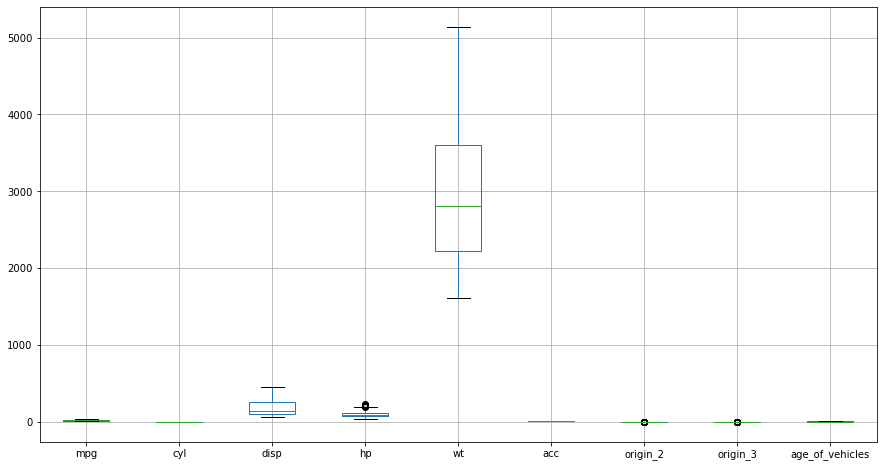

In [45]:
# Let us check for outliers after changing the dataset
plt.figure(figsize=(15, 8))
automb_data.boxplot()

- **From above box plot its loos like hp column have few outliers.**

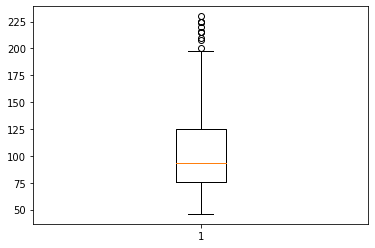

In [46]:
#check 'hp' column as we observed some outliers
plt.boxplot(automb_data['hp']);

- **hp column have outliers, we can do log transformation to hadle the outliers.**

In [47]:
#log transform to handle outliers of "hp"
automb_data['hp'] = np.log(automb_data['hp'])

- **Log transformantion done to remove outliers.**

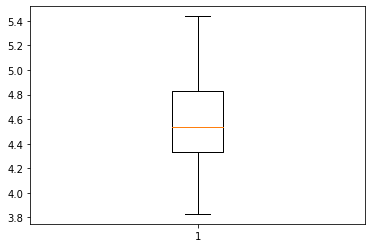

In [48]:
#Verify 'hp' column after log transformation
plt.boxplot(automb_data['hp']);

- **As we can see there is no outliers in hp column**

<AxesSubplot:xlabel='wt', ylabel='age_of_vehicles'>

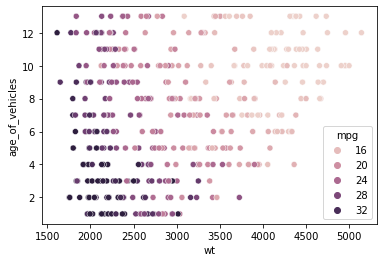

In [49]:
#check the distribution of 'age_of_vehicles', 'wt' with target
sns.scatterplot(data=automb_data, y='age_of_vehicles', x='wt', hue = 'mpg')

- **From above data it observed that when car weight increase the mpg is deceased, also observed that car with less weight and older also mpg is less for most of cars.**

<AxesSubplot:xlabel='wt', ylabel='hp'>

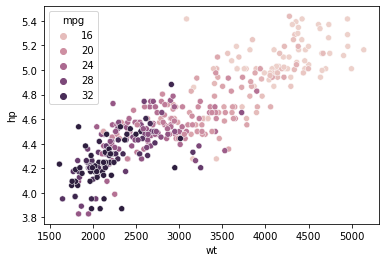

In [50]:
#check the distribution of 'hp', 'wt' with target
sns.scatterplot(data=automb_data, y='hp', x='wt', hue = 'mpg')

- **From above plot it observed when weight and hp of car increased mpg is decreased. Also looks both have high co-rrelation.**

<AxesSubplot:xlabel='cyl', ylabel='hp'>

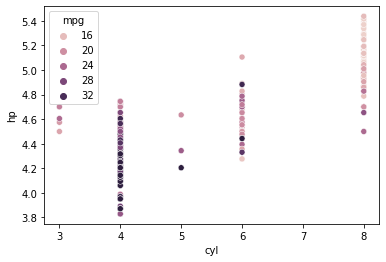

In [51]:
#check the distribution of 'hp', 'cyl' with target
sns.scatterplot(data=automb_data, y='hp', x='cyl', hue = 'mpg')

- **From above plot it observed when cyl and hp increased, mpg is decreased. Also looks both have high co-rrelation.**

<AxesSubplot:xlabel='hp', ylabel='acc'>

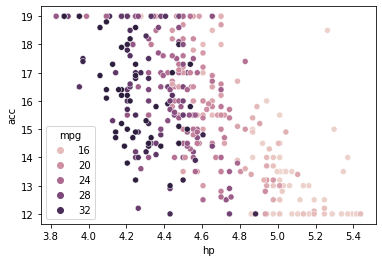

In [52]:
#check the distribution of 'hp', 'wt' with target
sns.scatterplot(data=automb_data, y='acc', x='hp', hue = 'mpg')

- **From above plot observed most of car acc is higher than 14, when acc is high then mpg little decease. Also observed it have not much relation with hp.**
- **Also observed that when hp increase mpg decreased.**

<AxesSubplot:xlabel='disp', ylabel='cyl'>

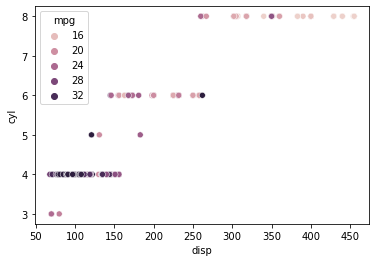

In [53]:
#check the distribution of 'cyl', 'wt' with target
sns.scatterplot(data=automb_data, y='cyl', x='disp', hue = 'mpg')

- **From above observed that higher displacement cars have more no.of cylinder and less mpg.**

<AxesSubplot:xlabel='disp', ylabel='wt'>

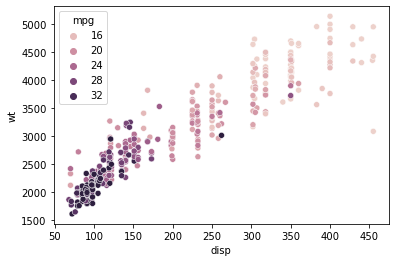

In [54]:
#check the distribution of 'disp', 'wt' with target
sns.scatterplot(data=automb_data, y='wt', x='disp', hue = 'mpg')

- **wt and disp have high co-relation when displacement increase weight of car insease and milage decreased.**

## Apply Feature Scaling

In [55]:
## Since dat ahave multiple units so scale the data
from scipy.stats import zscore
automb_data_scaled = automb_data.apply(zscore)

- **Applied standard scaller in dataset, to make all data are in same scale.**

## Split the data set into dependant and Independent variable

In [56]:
#separate dependant and independent variable
X = automb_data_scaled.drop('mpg', axis = 1)
y = automb_data_scaled['mpg']

### viii. Check the Multicollinearity using VIF

In [57]:
##import VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#define one funciton to check the vif
def calculate_vif(dataframe):
    
    #calculate vif
    vif_df = pd.DataFrame()
    vif_df['variables'] = dataframe.columns
    vif_df["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return vif_df

In [58]:
calculate_vif(X)

,variables,VIF
1,disp,20.456455
3,wt,11.793636
0,cyl,10.561819
2,hp,8.740900
4,acc,2.528643
6,origin_3,1.652837
5,origin_2,1.627514
7,age_of_vehicles,1.293229


- **From VIF it and from pair plot it confirm 'disp' is highly co-related with other attributes. So we can drop this attributes.**

In [59]:
#Drop disp column from autompg data set
X = X.drop('disp', axis = 1, errors='ignore')

In [60]:
#Again check VIF
calculate_vif(X)

,variables,VIF
2,wt,9.272524
1,hp,8.626544
0,cyl,6.122253
3,acc,2.447802
5,origin_3,1.545173
4,origin_2,1.460564
6,age_of_vehicles,1.257340


- **Drop "wt" column since VIF is high**

In [61]:
#Drop disp column from autompg data set
X = X.drop('wt', axis = 1, errors='ignore')

In [62]:
#Again check VIF
calculate_vif(X)

,variables,VIF
1,hp,4.964712
0,cyl,3.979955
2,acc,1.940973
4,origin_3,1.484503
3,origin_2,1.459545
5,age_of_vehicles,1.222497


- **As we can see above all data have VIF is less than 5. So we ll be not dropping anymore column from data set. After builing model will corss check the p-val and VIF again to cross check the multicolinearity in data.**

### Drop "wt" and "disp" column from original scaled data

In [63]:
#drop disp and wt from the scaled completed dataset
automb_data_scaled = automb_data_scaled.drop(['wt', 'disp'], axis = 1, errors='ignore')

### Check the correlation using correlation matrix

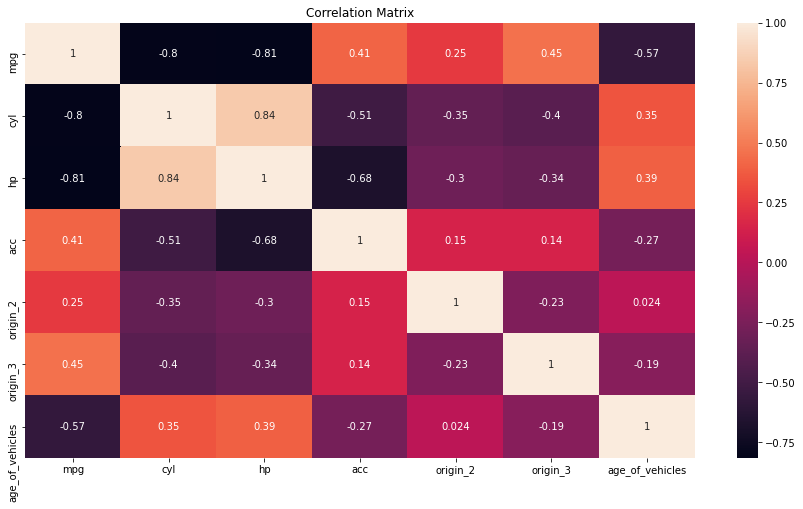

In [64]:
#check the correlation matrix
corr = automb_data_scaled.corr()

#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, ax=ax);

- **from correlation matrix we observed  hp and cyl have little high co-rrelation, rest other lookd fine.**

# 4. Machine learning:

### i.Before doing clustering Build one Linear Model

- Before applying clustering build one linear model. so it can be compare with the models develope after clustering.

In [65]:
### Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

- **Split data into 20% test and 80% train data.**

### Fit the data in LinearRegression Model

In [66]:
#import linear regression class
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [67]:
#check the model score
train_score = lnr.score(X_train, y_train)
test_score = lnr.score(X_test, y_test)
print('Training Score:', train_score)
print('Testing Score:', test_score)

Training Score: 0.8309434936068938
Testing Score: 0.8109053793442893


### Check the Model statas infomation

In [68]:
#import stats modelip
import statsmodels.api as sm
X_train_ml = sm.add_constant(X_train)  # This will add intercept

#Use OLS
lsr_result = sm.OLS(y_train, X_train_ml).fit()

In [69]:
#Check the model summary
print(lsr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     254.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          7.76e-117
Time:                        11:04:04   Log-Likelihood:                -167.99
No. Observations:                 318   AIC:                             350.0
Df Residuals:                     311   BIC:                             376.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0025      0.023     

In [70]:
#check the VIF
calculate_vif(X_train)

,variables,VIF
1,hp,4.969722
0,cyl,3.835376
2,acc,2.028112
4,origin_3,1.472291
3,origin_2,1.448378
5,age_of_vehicles,1.212555


- **Model stas looks fine. Adj. R-squared is 84% nearly.**

### ii. Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 

###  K-Means Clustering

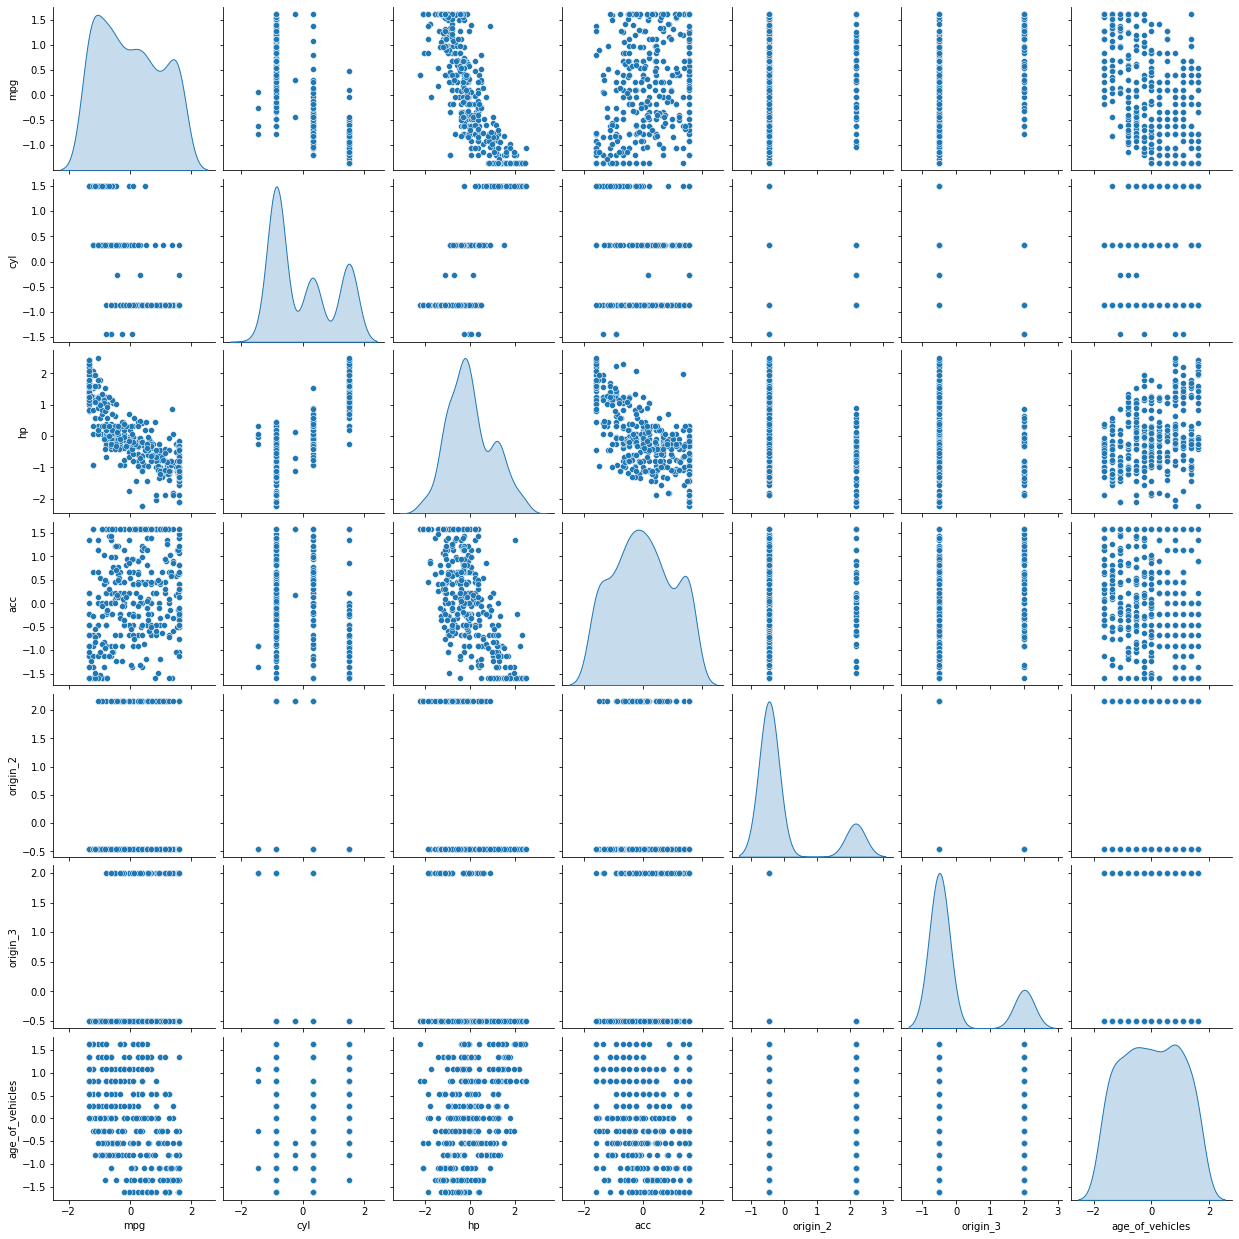

In [71]:
#before applying clustering check the pair plot with the new data set
sns.pairplot(automb_data_scaled, diag_kind='kde')

- **From diagonal its looks like we have three cluster in cyl, two cluster in dispercyl.**
- **hp have negative correlation with mpg.**

### Using Elbow method find the Optimal no.of cluster

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

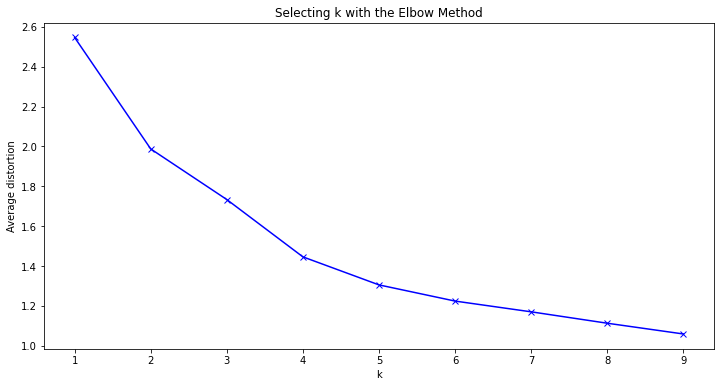

In [72]:
#Find the optimal no.of cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, n_init = 5, random_state=123)
    model.fit(automb_data_scaled)
    prediction=model.predict(automb_data_scaled)
    meanDistortions.append(sum(np.min(cdist(automb_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / automb_data_scaled.shape[0])


#plot Elbow graph    
plt.figure(figsize=(12,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- **Its looks like there is a proper bend in 2 and in 4, after that no proper bend. So we ll check the Shilhoutte score and WCSS and finalinze the best no.of cluster**

### Find WCSS for differnt clusters range

In [73]:
#check within cluster sum of squre(WCSS) score.
wcss= []
for i in range(1,11):
    km = KMeans(n_clusters = i,n_init = 5, random_state=123)
    km.fit(automb_data_scaled)
    wcss.append(km.inertia_)
    
#print WCSS score
wcss

[2785.9999999999995,
 1733.6420983729058,
 1311.8751058683445,
 953.4914265936546,
 793.2748319857751,
 703.1159274955822,
 634.9349207424399,
 604.2742212962231,
 535.9748557050916,
 494.70397804712513]

In [74]:
cluster_range = range( 2, 8 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5, random_state=123)
    clusters.fit(automb_data_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1733.642098
1,3,1311.875106
2,4,953.491427
3,5,793.274832
4,6,703.115927
5,7,634.934921


- **As we can observed after 793 there is small drop in the WCSS scorre. We can consider either 3 or 4 is the best no.of cluster based on WCSS, but still we need to check the Shilhoutte score and decide the optimum clusters.**

### Check the silhoutteScore

In [75]:
# check the shilhoutte score
silhoutteScore = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, n_init = 5, random_state=123)
    km.fit(automb_data_scaled)
    silhoutteScore.append(silhouette_score(automb_data_scaled, km.labels_))
    
#silhoutte score
silhoutteScore

[0.32982087748562183,
 0.3597449029292069,
 0.39974292927507876,
 0.38194923043614837,
 0.393288932494064,
 0.39079936433016005,
 0.33919632507751013,
 0.34368764946267943,
 0.332055636350535]

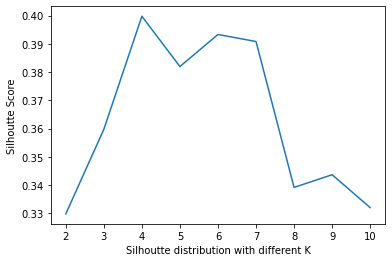

In [76]:
#plot silhoutte score
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.xlabel('Silhoutte distribution with different K')
plt.plot(range(2,11), silhoutteScore)

- **Based on Silhoutte score it looks like 4 is the best no.of clusters.**
- **Next will check with diffent clustering techinique like Hierarchical clustering then we ll finally concluse the no.of cluster.**

In [77]:
# Let check with K = 4
final_model=KMeans(n_clusters= 4, n_init= 5, random_state=123)
final_model.fit(automb_data_scaled)
prediction = final_model.predict(automb_data_scaled)  # aslo can be used final_model.labels_

### Checking the count of data points in each cluster.

In [78]:
counts = np.bincount(prediction[ prediction >=0])
print(counts)

[102  79  70 147]


- **It shows each cluser how many similar data points have. More detail of each cluster explained below.**

In [79]:
# let us check the centers in each group
centroids = final_model.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(automb_data_scaled) )
centroid_df

,mpg,cyl,hp,acc,origin_2,origin_3,age_of_vehicles
0,-1.164281,1.452024,1.377597,-1.079192,-0.461968,-0.497643,0.647825
1,0.913117,-0.796713,-0.678126,0.286117,-0.461968,2.009471,-0.388030
2,0.545393,-0.763822,-0.658269,0.317444,2.164651,-0.497643,0.053010
3,0.057434,-0.215637,-0.277987,0.443900,-0.461968,-0.497643,-0.266221


- ***Observation:***
- we can observe form the centroid  cetroids each clusers are properly classifed. 

## Add the original data info cluster group

In [80]:
## Add mpg in the scale data for more cluter analysis
kmean_scaled_data = automb_data_scaled.copy()
automb_data_kmean = automb_data.copy()

In [81]:
#Append the prediction 
automb_data_kmean['group'] = prediction
kmean_scaled_data['group'] = prediction

print("Groups Assigned : \n")
automb_data_kmean.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles,group
0,18.0,8,307.0,4.867534,3504,12.0,0,0,13,0
1,15.0,8,350.0,5.105945,3693,12.0,0,0,13,0
2,18.0,8,318.0,5.010635,3436,12.0,0,0,13,0
3,16.0,8,304.0,5.010635,3433,12.0,0,0,13,0
4,17.0,8,302.0,4.941642,3449,12.0,0,0,13,0


In [82]:
auto_cluster_kmean_grp = automb_data_kmean.groupby(['group'])
auto_cluster_kmean_grp.mean()

,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles
group,,,,,,,,,
0,15.279412,7.921569,343.156863,5.056112,4096.333333,13.117647,0.0,0.0,9.382353
1,29.554937,4.101266,102.708861,4.356344,2221.227848,16.139241,0.0,1.0,5.556962
2,27.028000,4.157143,109.142857,4.363103,2423.300000,16.208571,1.0,0.0,7.185714
3,23.674830,5.088435,178.418367,4.492551,2852.346939,16.488435,0.0,0.0,6.006803


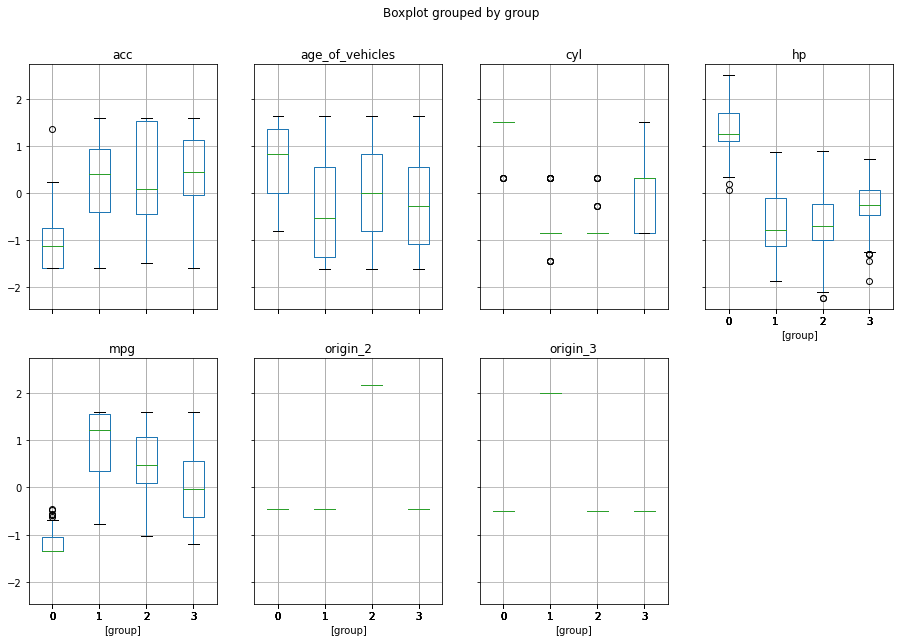

In [83]:
kmean_scaled_data.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10));

#### Observation

- Group 0 is characterised by higher weight, lower acc, high hp, high no.of cylinder, most are old vehicle and milage is lower.
- Group 1 and Group 2 is characterised by comparing with Group 0 and Group 3-->  weight is less, higher acc, low hp, less no.of cylinder and milage is higher. Also from data its looks like both cluster data only little vary and miles per galon.
- Group 3 - mostly medium range vehicle compare the Group 0, these cars are little high milage and also weight, hp, cyl is also lesser.

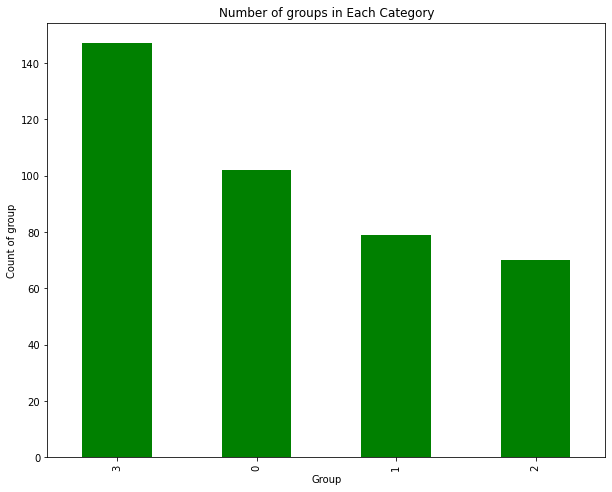

In [84]:
plt.figure(figsize=(10,8))
automb_data_kmean['group'].value_counts().plot.bar(color='green')
plt.xlabel("Group")
plt.ylabel("Count of group")
plt.title("Number of groups in Each Category")
plt.show()

- **From k_mean we concluded there the 4 clusers, which sepate the cars in diffent segment respted to mpg**

##  Hierarchical clustering to find out the optimal number of clusters in the data

In [85]:
#import libraries
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

### Choosing average linkage method

In [86]:
#using Average linkage
link_method = linkage(automb_data_scaled, metric='euclidean', method= 'average')

In [87]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
c, coph_dists = cophenet(link_method , pdist(automb_data_scaled))
print('Cophenet Correlation:', c)

Cophenet Correlation: 0.7579185516148066


- **Cohpenet correlation value is closer to one means the better the clusers. where we got nearly .75**

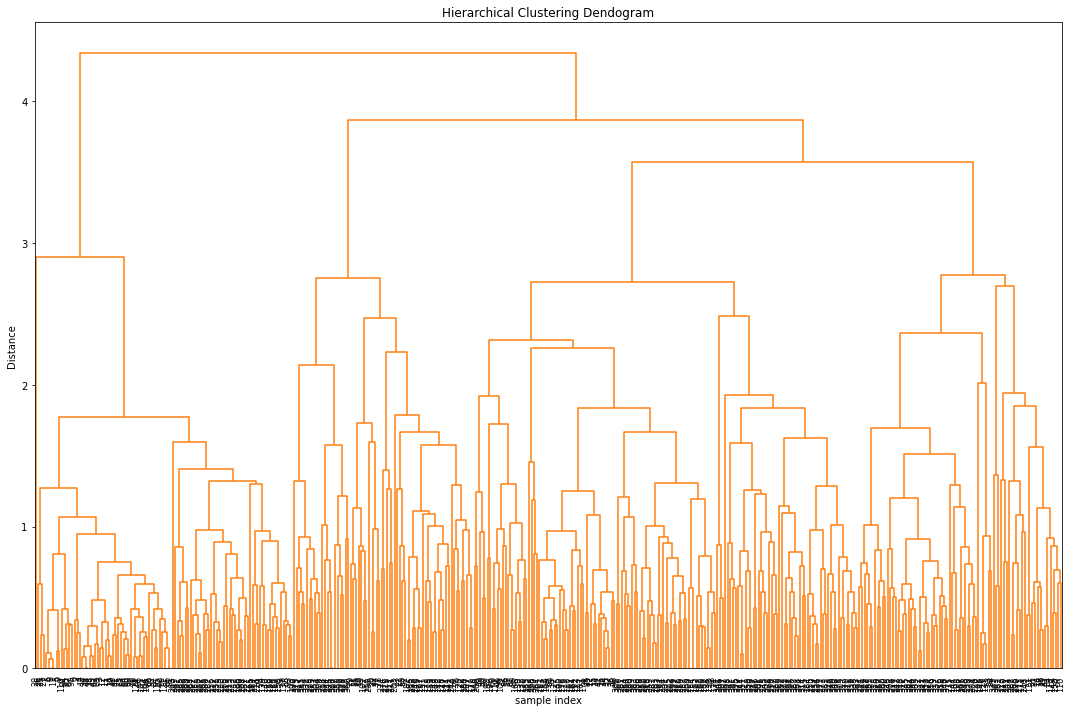

In [88]:
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_method, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.
          )
plt.tight_layout()

### Cutting dendogram with suitable cluster

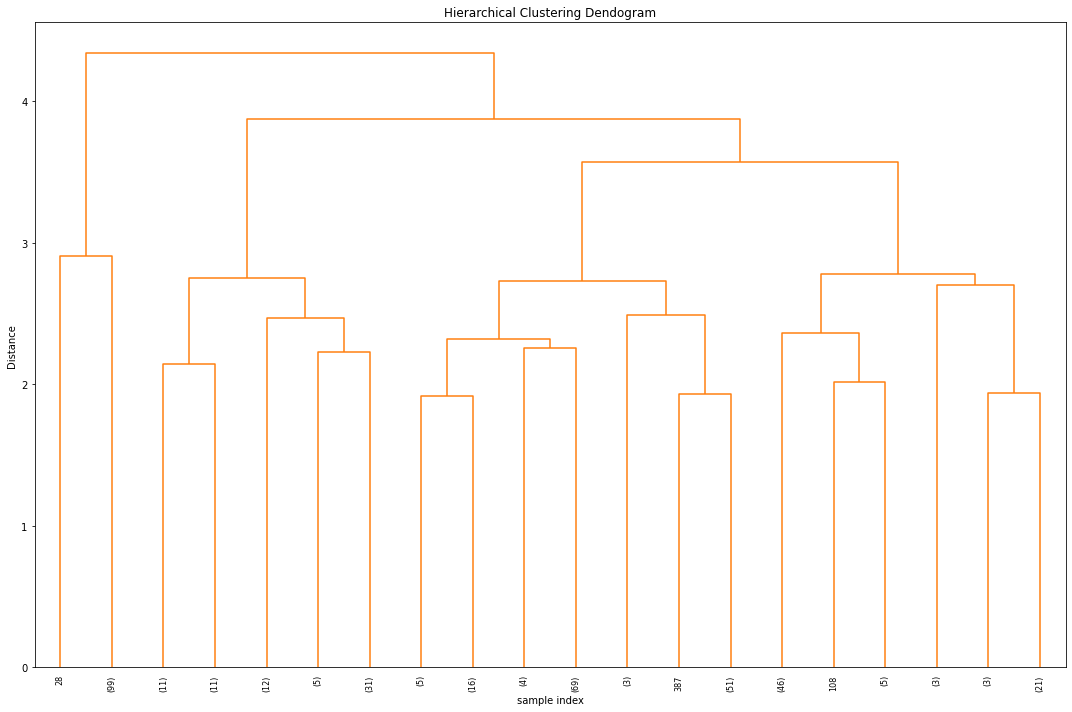

In [89]:
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_method, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.,
           p = 20,
           truncate_mode='lastp',
          )
plt.tight_layout()

In [90]:
#using Average complete
link_complete = linkage(automb_data_scaled, metric='euclidean', method= 'complete')
c, coph_dists = cophenet(link_complete , pdist(automb_data_scaled))
print('Cophenet Correlation:', c)

Cophenet Correlation: 0.6654912159807322


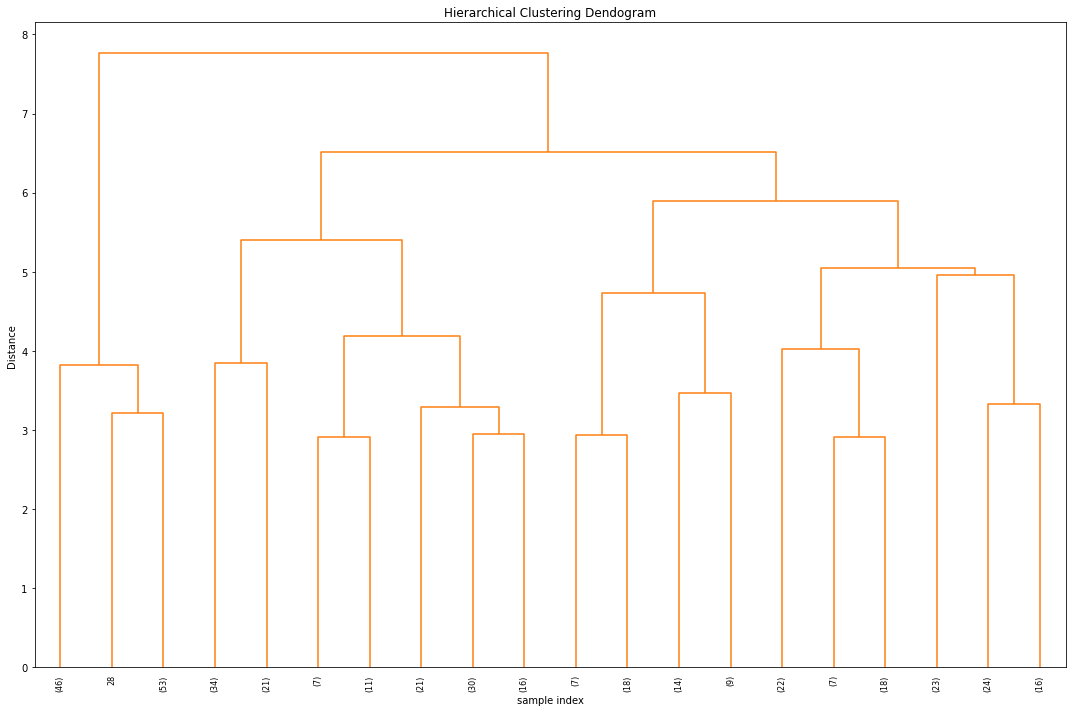

In [91]:
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_complete, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.,
           p = 20,
           truncate_mode='lastp',
          )
plt.tight_layout()

In [92]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

linkage_ward = linkage(automb_data_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(linkage_ward , pdist(automb_data_scaled))
print('Cophenet Correlation:', c)

Cophenet Correlation: 0.7199052128506976


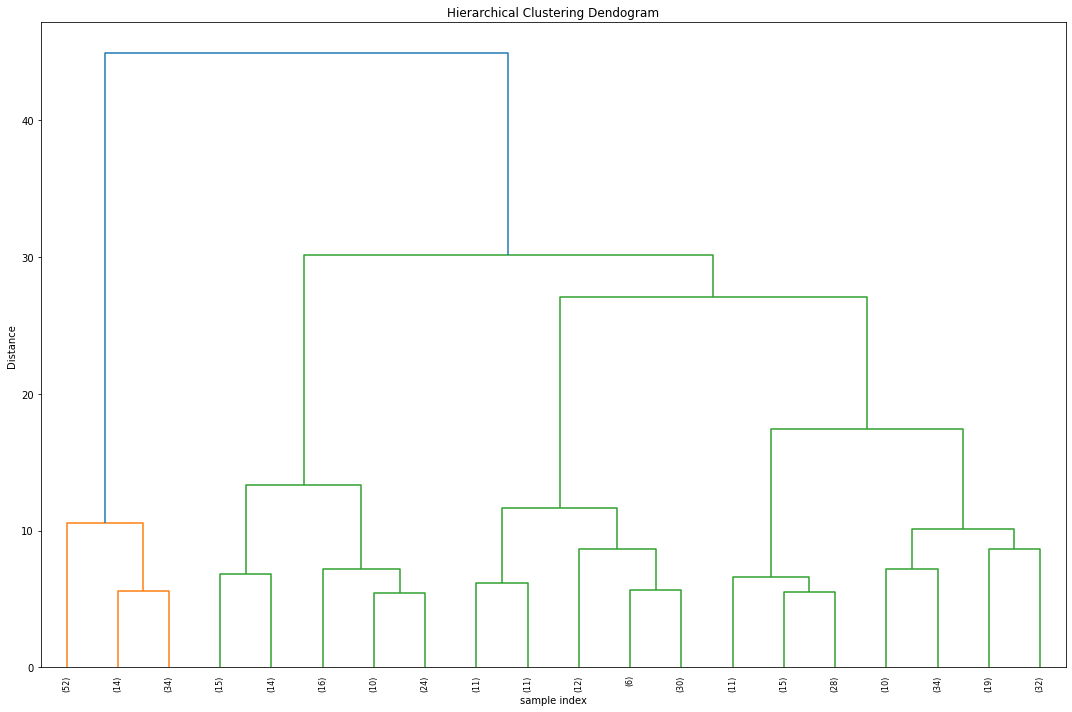

In [93]:
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage_ward, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.,
           p = 20,
           truncate_mode='lastp',
          )
plt.tight_layout()

In [94]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

linkage_ward = linkage(automb_data_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(linkage_ward , pdist(automb_data_scaled))
print('Cophenet Correlation:', c)

Cophenet Correlation: 0.6635871116634593


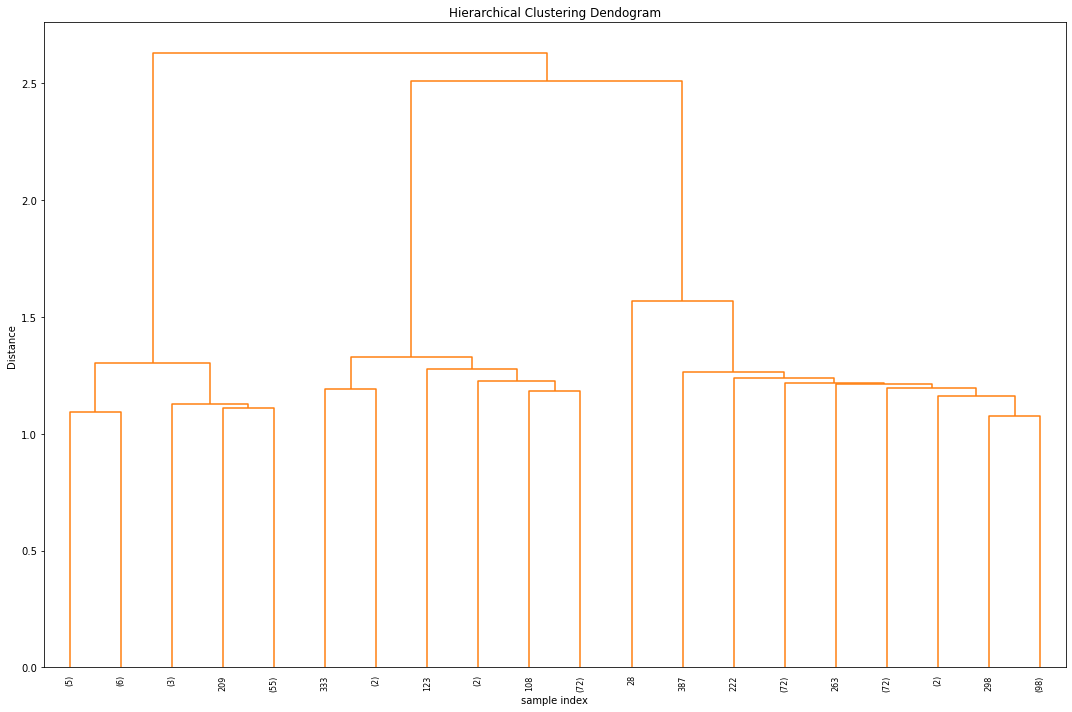

In [95]:
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage_ward, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.,
           p = 20,
           truncate_mode='lastp',
          )
plt.tight_layout()

- **From above Cophenet Correlation we observed that "average" linkage method is better than other linkage method. since the cophenet correlation of average linkage method is higer compare to other distance measured.**

- **From dendogram we can observed if we divide into 4 clusters, which can represt the different segment of car in better categories.**

### Use silhoutteScore to chcek the best no.of clusters.

In [96]:
#Determine the optimal number of clusters using [Silhouette Score]
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

silhouette_scores1 = [] 
for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters= k, affinity='euclidean',  linkage='average')
    silhouette_scores1.append(silhouette_score(automb_data_scaled, model.fit_predict(automb_data_scaled))) 
    
# Plotting a bar graph to compare the results , noticing we start at 2 clusters for silhouette coefficient
#silhoutte score
silhouette_scores1

[0.34079729079952015,
 0.3449812225700712,
 0.3989690125556896,
 0.36768332246181884,
 0.3602190959058775,
 0.3503376803199562]

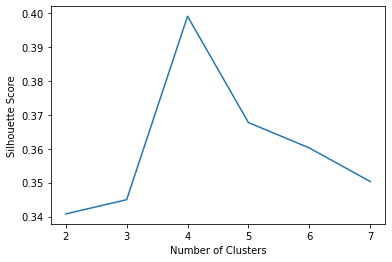

In [97]:
plt.plot(range(2, 8), silhouette_scores1)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

- **Form silhoutte Score it observed if we choosing 4 clusters is better as the silhoutte score is hihger in case of no.of clusters 4.**

### create copy of the data set

In [98]:
hr_scaled_data = automb_data_scaled.copy()
automb_data_hr = automb_data.copy()

### Use AgglomerativeClustering technique for no.of clusters 4 and find the different cars segments.

In [99]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
clusters=agg.fit_predict(automb_data_scaled)

hr_scaled_data['Agg_label'] = agg.labels_
automb_data_hr['Agg_label'] = agg.labels_

In [100]:
print("Agglomerative labels")
hr_scaled_data['Agg_label'].value_counts()

Agglomerative labels


3    149
0    100
1     79
2     70
Name: Agg_label, dtype: int64

#### As we can see above data
- cluster_1 have 100 cars
- cluster_2 have 79 cars
- cluster_3 have 70 cars
- cluster_4 have 149 cars

Below section we ll do more analysis of each car categories.

## K-mean Cluster Data with 4 clusters

In [101]:
#check the mean of each clusers
auto_cluster_kmean_grp.mean()

,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles
group,,,,,,,,,
0,15.279412,7.921569,343.156863,5.056112,4096.333333,13.117647,0.0,0.0,9.382353
1,29.554937,4.101266,102.708861,4.356344,2221.227848,16.139241,0.0,1.0,5.556962
2,27.028000,4.157143,109.142857,4.363103,2423.300000,16.208571,1.0,0.0,7.185714
3,23.674830,5.088435,178.418367,4.492551,2852.346939,16.488435,0.0,0.0,6.006803


## Hierarchical Cluster Data with 4 clusters

In [102]:
automb_data_hr_grp = automb_data_hr.groupby(['Agg_label'])
automb_data_hr_grp.mean()

,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles
Agg_label,,,,,,,,,
0,15.254000,7.980000,345.470000,5.064643,4121.560000,13.115000,0.0,0.0,9.260000
1,29.554937,4.101266,102.708861,4.356344,2221.227848,16.139241,0.0,1.0,5.556962
2,27.028000,4.157143,109.142857,4.363103,2423.300000,16.208571,1.0,0.0,7.185714
3,23.579195,5.087248,179.077181,4.494390,2852.114094,16.444966,0.0,0.0,6.134228


- **if we compare this with k-mean clustering, no.of data points counts nearly same in each cluster with little variance.**
- **So both Hierchical and K-mean result showing  no.of clusters four is better representation of data points.**
- **Date distributed in 4 clustes with respect the mpg base of the different parameter like wt, cyl, hp disp etc.**

### Visual Comparison of Clustering

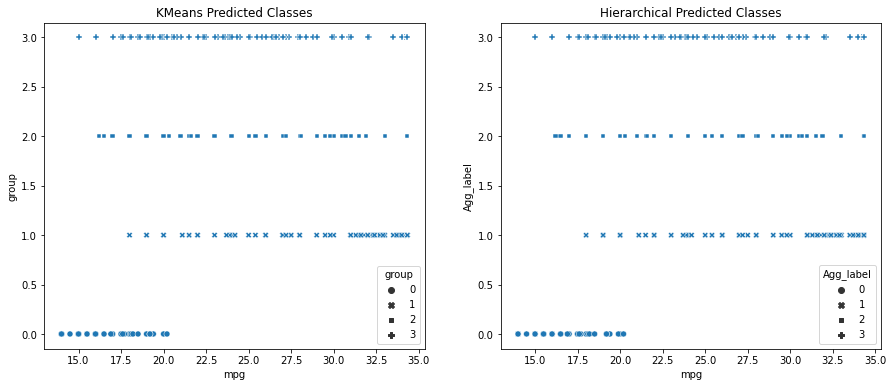

In [103]:
#Visual Comparison of Clustering
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

ax1 = plt.subplot(1,2,1)
plt.title('KMeans Predicted Classes')
sns.scatterplot(x='mpg', y='group', style='group', data = automb_data_kmean, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Hierarchical Predicted Classes')
sns.scatterplot(x='mpg', y='Agg_label', style = 'Agg_label', data = automb_data_hr, ax=ax2)

plt.show()

- **From K-Meand and Agglomerative it observed that both mostly dividing data into 4 clusters are approximately same. Also we obsered from mean it looks nearly same**
- **since both cluster techique giving mostly same reslutl. we ll consider K-mean data for diving data into 4 clusers and develop learn model**

### Note:-
- As we observed from both clustering, cluster 2 and 3 both have cars with high mpg with little variation.
- So we ll merge cluser 2 and 3 as higher mpg cars.

In [104]:
## Combine cluster 2 and 3 as one and resequnce the remaing two cluser so we ll have cluster 1 , 2 and 3.
kmean_scaled_data['group'] = kmean_scaled_data.group.replace(1, 2)
kmean_scaled_data['group'] = kmean_scaled_data.group.replace(0, 1)

In [105]:
kmean_scaled_data['group'].value_counts()

2    149
3    147
1    102
Name: group, dtype: int64

- **After merging now we have 3 different segments of cars[Low mgp, medium mpg and high mpg].**
- CLuster_1 have all 

In [106]:
automb_data_kmean['group'] = kmean_scaled_data['group']
automb_data_kmean.groupby(['group']).mean()

,mpg,cyl,disp,hp,wt,acc,origin_2,origin_3,age_of_vehicles
group,,,,,,,,,
1,15.279412,7.921569,343.156863,5.056112,4096.333333,13.117647,0.000000,0.000000,9.382353
2,28.367785,4.127517,105.731544,4.359519,2316.161074,16.171812,0.469799,0.530201,6.322148
3,23.674830,5.088435,178.418367,4.492551,2852.346939,16.488435,0.000000,0.000000,6.006803


- **After merging the cluster 1 and 2 to cluser 2. now we can observed, we have 3 segment of vehicles respect the mpg.**
- **cluster 1 have low mgp vehicles.** 
- **cluster 3 have medium range mpg vehicles.**
- **cluster 2 have high range mpg vehicles.**

##  Share your insights about the difference in using these two methods.
- As we observed from above data from both clustering techinque. Both K-Mean and Hierarchical clustering indicates 4 is the best no.of clusters. 
- Also we observed the data is similarly distributed in both the cases with little variance.
- Also we observed in both clustering scenario two clusters have high mpg cars with very little difference, so we merged both the cluster as high mpg cars for better result.


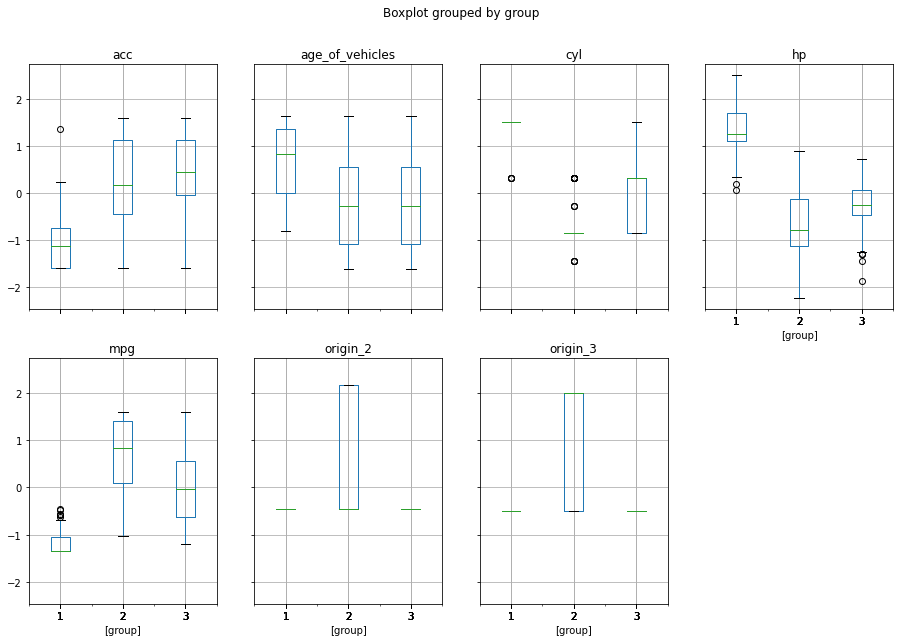

In [107]:
kmean_scaled_data.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10));

- **From above box plot we can observe clusters are more separable**

## 5. Answer below questions based on outcomes of using ML based methods.

### i.Mention how many optimal clusters are present in the data and what could be the possible reason behind it
- As we observed from both clutering techinque 4 is the best no.of clusters.
- the data divided into 4 clusters based the the major parameter like wt, hp, cyl, disp and mpg.
- All 4 clusters have cars with different mpg.
- As we saw the cars with high mpg contain two clusters have very minimal difference in mpg and other parameter like wt, hp, disp and cylinder so i think better merge these two clusers data to make one clusters.
- So finally we have 3 clusters, which contain 3 segments of cara respect the mgp [ Low mpg, Medium mpg and high mpg cars]

- Also we observed cars with high wt, hp , disp , more no.of cyl have less miles per galon and those cars have these parameters value low have high miles per galon.
- Also we observed most of old cars have less miles per galon.

### ii.Use linear regression model on different clusters separately and print the coefficients of the models individually

### Separate the data into three cluster group

In [108]:
X_scaled_df_cl1 = kmean_scaled_data[kmean_scaled_data['group'] == 1]
X_scaled_df_cl2 = kmean_scaled_data[kmean_scaled_data['group'] == 2]
X_scaled_df_cl3 = kmean_scaled_data[kmean_scaled_data['group'] == 3]

In [109]:
print('Shape of cluser one data set:', X_scaled_df_cl1.shape, '\n')
X_scaled_df_cl1.head()

Shape of cluser one data set: (102, 8) 



,mpg,cyl,hp,acc,origin_2,origin_3,age_of_vehicles,group
0,-0.768376,1.498191,0.823608,-1.584202,-0.461968,-0.497643,1.627426,1
1,-1.204941,1.498191,1.523992,-1.584202,-0.461968,-0.497643,1.627426,1
2,-0.768376,1.498191,1.243998,-1.584202,-0.461968,-0.497643,1.627426,1
3,-1.059420,1.498191,1.243998,-1.584202,-0.461968,-0.497643,1.627426,1
4,-0.913898,1.498191,1.041316,-1.584202,-0.461968,-0.497643,1.627426,1


In [110]:
print('Shape of cluser two data set:', X_scaled_df_cl2.shape, '\n')
X_scaled_df_cl2.head()

Shape of cluser two data set: (149, 8) 



,mpg,cyl,hp,acc,origin_2,origin_3,age_of_vehicles,group
14,0.104754,-0.856321,-0.097829,-0.228650,-0.461968,2.009471,1.627426,2
18,0.541319,-0.856321,-0.322683,-0.454575,-0.461968,2.009471,1.627426,2
19,0.395797,-0.856321,-2.228367,1.578752,2.164651,-0.497643,1.627426,2
20,0.250275,-0.856321,-0.356257,0.900977,2.164651,-0.497643,1.627426,2
21,0.104754,-0.856321,-0.256664,-0.454575,2.164651,-0.497643,1.627426,2


In [111]:
print('Shape of cluser three data set:', X_scaled_df_cl3.shape, '\n')
X_scaled_df_cl3.head()

Shape of cluser three data set: (147, 8) 



,mpg,cyl,hp,acc,origin_2,origin_3,age_of_vehicles,group
15,-0.186290,0.320935,-0.097829,-0.002725,-0.461968,-0.497643,1.627426,3
16,-0.768376,0.320935,-0.036625,-0.002725,-0.461968,-0.497643,1.627426,3
17,-0.331811,0.320935,-0.424579,0.223201,-0.461968,-0.497643,1.627426,3
24,-0.331811,0.320935,-0.256664,-0.228650,-0.461968,-0.497643,1.627426,3
30,0.686840,-0.856321,-0.256664,-0.002725,-0.461968,-0.497643,1.356642,3


## Cluster One

In [112]:
#splict data data into independent and depandata variable 
X1 = X_scaled_df_cl1.drop(['mpg', 'group'], axis = 1)
y1 = X_scaled_df_cl1['mpg']


### Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_cl1, X_test_cl1, y_train_cl1, y_test_cl1 = train_test_split(X1, y1, test_size = 0.25, random_state=1)

#import linear regression class
from sklearn.linear_model import LinearRegression
lnr_cl1 = LinearRegression()
lnr_cl1.fit(X_train_cl1, y_train_cl1)

LinearRegression()

### Coefficient LinearRegression for Cluster 1:

In [113]:
for idx, col_name in enumerate(X_train_cl1.columns):
    print(col_name, ':', lnr_cl1.coef_[idx])

cyl : -0.2585940686749803
hp : -0.14677261706869313
acc : -0.11892925413774455
origin_2 : -1.910669147078666e-31
origin_3 : 3.310125504881535e-30
age_of_vehicles : -0.1540093867679815


In [114]:
#check the model score
train_score_cl1 = lnr_cl1.score(X_train_cl1, y_train_cl1)
test_score_cl1 = lnr_cl1.score(X_test_cl1, y_test_cl1)
print('Training Score:', train_score_cl1)
print('Testing Score:', test_score_cl1)


Training Score: 0.44269271032921087
Testing Score: 0.43411846644188856


In [115]:
#import stats modelip
import statsmodels.api as sm
X_train_ml_cl1 = sm.add_constant(X_train_cl1)  # This will add intercept

#Use OLS
lsr_result_cl1 = sm.OLS(y_train_cl1, X_train_ml_cl1).fit()

#Check the model summary
print(lsr_result_cl1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     14.10
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.62e-08
Time:                        11:05:18   Log-Likelihood:                 21.597
No. Observations:                  76   AIC:                            -33.19
Df Residuals:                      71   BIC:                            -21.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cyl                -0.2586      0.093     

- As we can see the Adjusted R^2 value is less (nearly 42%)

In [116]:
#check the VIF
calculate_vif(X_train_cl1)

,variables,VIF
1,hp,1.540607
2,acc,1.374685
4,origin_3,1.363229
5,age_of_vehicles,1.343464
0,cyl,1.269511
3,origin_2,1.051903


## Cluster Two

In [117]:
#splict data data into independent and depandata variable 
X2 = X_scaled_df_cl2.drop(['mpg', 'group'], axis = 1)
y2 = X_scaled_df_cl2['mpg']


### Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_cl2, X_test_cl2, y_train_cl2, y_test_cl2 = train_test_split(X2, y2, test_size = 0.20, random_state=11)

#import linear regression class
from sklearn.linear_model import LinearRegression
lnr_cl2 = LinearRegression()
lnr_cl2.fit(X_train_cl2, y_train_cl2)

LinearRegression()

### Coefficient LinearRegression for Cluster 2:

In [118]:
for idx, col_name in enumerate(X_train_cl2.columns):
    print(col_name, ':', lnr_cl2.coef_[idx])

cyl : -0.0875735558739626
hp : -0.7064746741927652
acc : -0.08327474231797494
origin_2 : -0.03358412668847325
origin_3 : 0.03205613173808019
age_of_vehicles : -0.33506524623981054


In [119]:
#check the model score
train_score_cl2 = lnr_cl2.score(X_train_cl2, y_train_cl2)
test_score_cl2 = lnr_cl2.score(X_test_cl2, y_test_cl2)
print('Training Score:', train_score_cl2)
print('Testing Score:', test_score_cl2)

Training Score: 0.6536785329562484
Testing Score: 0.6363351238427326


In [120]:
#import stats modelip
import statsmodels.api as sm
X_train_ml_cl2 = sm.add_constant(X_train_cl2)  # This will add intercept

#Use OLS
lsr_result_cl2 = sm.OLS(y_train_cl2, X_train_ml_cl2).fit()

#Check the model summary
print(lsr_result_cl2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     42.66
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.69e-24
Time:                        11:05:18   Log-Likelihood:                -71.853
No. Observations:                 119   AIC:                             155.7
Df Residuals:                     113   BIC:                             172.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0757      0.049     

- As we can see the Adjusted R^2 value is less (nearly 64%)

## Cluster Three

In [121]:
#splict data data into independent and depandata variable 
X3 = X_scaled_df_cl3.drop(['mpg', 'group'], axis = 1)
y3 = X_scaled_df_cl3['mpg']


### Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_cl3, X_test_cl3, y_train_cl3, y_test_cl3 = train_test_split(X3, y3, test_size = 0.2, random_state=1)

#import linear regression class
from sklearn.linear_model import LinearRegression
lnr_cl3 = LinearRegression()
lnr_cl3.fit(X_train_cl3, y_train_cl3)

LinearRegression()

### Coefficient LinearRegression for Cluster 3:

In [122]:
for idx, col_name in enumerate(X_train_cl3.columns):
    print(col_name, ':', lnr_cl3.coef_[idx])

cyl : -0.30393052841291085
hp : -0.6907468980048012
acc : -0.3137098514397703
origin_2 : -2.5929578634244337e-32
origin_3 : 2.189607380275786e-32
age_of_vehicles : -0.3511515452556749


In [123]:
#check the model score
train_score_cl3 = lnr_cl3.score(X_train_cl3, y_train_cl3)
test_score_cl3 = lnr_cl3.score(X_test_cl3, y_test_cl3)
print('Training Score:', train_score_cl3)
print('Testing Score:', test_score_cl3)

Training Score: 0.7301505511009951
Testing Score: 0.7247671673548532


In [124]:
#import stats modelip
import statsmodels.api as sm
X_train_ml_cl3 = sm.add_constant(X_train_cl3)  # This will add intercept

#Use OLS
lsr_result_cl3 = sm.OLS(y_train_cl3, X_train_ml_cl3).fit()

#Check the model summary
print(lsr_result_cl3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     75.76
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           5.82e-31
Time:                        11:05:18   Log-Likelihood:                -60.914
No. Observations:                 117   AIC:                             131.8
Df Residuals:                     112   BIC:                             145.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cyl                -0.3039      0.079     

- **After modeling each cluster using LinearRegression we observed:**
- Cluster one prediction is little less, may be becuase it have very less number of data points so it impacting the model accuracy.
- Cluster 2 accuracy is nearly 64%
- Cluster 4 accuracy is nealry 73%

### How using different models for different clusters will be helpful in this case and how it will be different than using one single model without. clustering? Mention how it impacts performance and prediction.

- **From the model accuracy we observed model with all the data points without clustering accuaracy is 83%. After clustering for cluster for cluster one accuracy is very low (nearly 44%) and for cluster two the accuracy is 65% and cluster three the accurachy is 73%.**

- **if we average out all three cluster model score it coming nearly 61%**
- **So my observation without clustering the model accuracy is little higher side. May be it impacted due to very less data points but one thing better afgter clustering we figureout the diffent segment of cars**

## 6. Improvisation:



- Data looks very clean and have varity of segment of car data.
- Quality of data looks good.
- Sample size little less, for bigger sample alwasy better to cover all different scenario and help in accuracy.